<a href="https://colab.research.google.com/github/akashmathur-2212/LLMs-playground/blob/main/LangChain-applications/Video-Summarization-Langchain/summarize_youtube_videos_with_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

- Use Langchain to create a summary of an youtube video (in english)
- Use [Falcon](https://huggingface.co/h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2) (fully open source chat model)

# Installs & Imports

In [1]:
%%time

! pip install -qq -U langchain youtube_transcript_api einops
! pip install -qq -U accelerate bitsandbytes xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.3/794.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
from IPython.display import YouTubeVideo

import torch

import langchain
from langchain.document_loaders import YoutubeLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import LLMChain
from langchain.chains.summarize import load_summarize_chain
from langchain.llms import HuggingFacePipeline

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# Video

- Provide the ID of the video
- Just visualize the video in the notebook

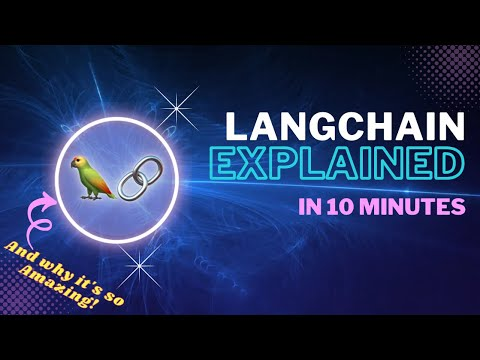

In [3]:
YouTubeVideo('Y_O-x-itHaU', width=700, height=500)

# Load video

With Langchain

In [4]:
loader = YoutubeLoader.from_youtube_url("https://www.youtube.com/watch?v=Y_O-x-itHaU")
transcript = loader.load()

In [5]:
transcript

[Document(page_content="land chain is one of the hottest AI Frameworks right now with over 40 000 stars on GitHub as of this video let me help you understand some of the most important aspects of Lang chain and why it's such an amazing library to work with most of us have used chat GPT and are quite fascinated by its capabilities so you can add something like write in this style of Shakespeare how to cook pasta so what happens behind the scenes is that it takes your input and sends it to an AI system as a prompt and that generates a response which is provided back to you and often these systems are called large language models which are trained on a huge amount of text Data from the internet now I want you to imagine a scenario where you are an instructor and you want your students to use chat GPT and submit all of their assignments in the written style of Shakespeare so you can imagine that most of our students are prompting chat GPT to write in this style of Shakespeare and this is q

# Splitter

In [6]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=50)
texts = text_splitter.split_documents(transcript)

In [7]:
len(texts)

4

# Model

In [8]:
%%time

model_repo = 'h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2'

tokenizer = AutoTokenizer.from_pretrained(model_repo)

model = AutoModelForCausalLM.from_pretrained(model_repo,
                                             load_in_8bit=True,
                                             device_map='auto',
                                             torch_dtype=torch.float16,
                                             low_cpu_mem_usage=True,
                                             trust_remote_code=True
                                            )
max_len = 2048 # 1024
task = "text-generation"

tokenizer_config.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

configuration_RW.py:   0%|          | 0.00/2.61k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modelling_RW.py:   0%|          | 0.00/47.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

CPU times: user 26.6 s, sys: 52.6 s, total: 1min 19s
Wall time: 7min 34s


In [9]:
pipe = pipeline(
    task=task,
    model=model,
    tokenizer=tokenizer,
    max_length=max_len,
    temperature=0,
    top_p=0.95,
    repetition_penalty=1.15,
    pad_token_id = 11
)

llm = HuggingFacePipeline(pipeline=pipe)

# Summarize chain

There are three options for chain_type:
- "stuff"
- "map_reduce"
- "refine"

## Default prompt template

In [10]:
chain = load_summarize_chain(llm=llm, chain_type="map_reduce", verbose=True)

In [11]:
chain

MapReduceDocumentsChain(verbose=True, llm_chain=LLMChain(verbose=True, prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7969e02ec580>)), reduce_documents_chain=ReduceDocumentsChain(verbose=True, combine_documents_chain=StuffDocumentsChain(verbose=True, llm_chain=LLMChain(verbose=True, prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7969e02ec580>)), document_variable_name='text')), document_variable_name='text')

In [12]:
### default prompt template
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [13]:
%%time

# Run the chain with verbose=True
summary = chain.run(texts)
summary



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"land chain is one of the hottest AI Frameworks right now with over 40 000 stars on GitHub as of this video let me help you understand some of the most important aspects of Lang chain and why it's such an amazing library to work with most of us have used chat GPT and are quite fascinated by its capabilities so you can add something like write in this style of Shakespeare how to cook pasta so what happens behind the scenes is that it takes your input and sends it to an AI system as a prompt and that generates a response which is provided back to you and often these systems are called large language models which are trained on a huge amount of text Data from the internet now I want you to imagine a scenario where you are an instructor and you want your students to use chat GPT and submit all of their assignments in the written style of 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



> Finished chain.


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]



> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"

Lang Chain is a popular AI framework that allows developers to create chat-style GPT models. It uses a combination of user input and a base prompt to generate responses. Prompt templates allow developers to provide specific instructions to the LLM, such as being helpful or an expert in a particular field.



1. "Under the model section, you might have noticed that there are a few steps happening here where we take the prompt template and provide the user input to it and then specify the LLM before we make a call to the LLM for the response lag chain makes it easy where we can link all of these components together by something called chains. Chains are core building blocks of Lang chain, which can help us achieve a specific task by linking multiple components together. There are many different types of chains available in Lang chain, and these chains are often named after the tasks

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



> Finished chain.

> Finished chain.
CPU times: user 6min 12s, sys: 344 ms, total: 6min 12s
Wall time: 6min 17s


' Langchain is a popular AI framework that allows developers to create chat-style GPT models. It uses a combination of user input and a base prompt to generate responses. Prompt templates allow developers to provide specific instructions to the LLM, such as being helpful or an expert in a particular field.'

In [14]:
len(summary)

306

In [15]:
summary

' Langchain is a popular AI framework that allows developers to create chat-style GPT models. It uses a combination of user input and a base prompt to generate responses. Prompt templates allow developers to provide specific instructions to the LLM, such as being helpful or an expert in a particular field.'

## Custom prompt template

In [16]:
chain2 = load_summarize_chain(llm=llm, chain_type="map_reduce", verbose=False)

In [17]:
### change the prompt template
chain2.llm_chain.prompt.template = \
"""Write a three paragraph summary the following:


"{text}"


3 PARAGRAPH SUMMARY:"""

In [18]:
%%time

# Run the chain  with verbose=False
summary = chain2.run(texts)
summary

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386:

CPU times: user 10min 43s, sys: 1.48 s, total: 10min 44s
Wall time: 10min 50s


"\n\nLang Chain is a popular AI framework that allows developers to create advanced language models. It uses a technique called prompt templates, which allow users to combine user input with a base prompt to generate responses from the LLM. This technique can be used to create applications that allow users to write in the style of Shakespeare. Under the model section, you may have noticed that there are a few steps happening here where we take the prompt template and provide the user input to it and then specify the LLM before we make a call to the LLM for the response. There are many different types of chains available in Lang Chain and these chains are often named after the tasks they perform in our earlier example we wanted to call an LLM the chain for that is LLM chain if we would like to perform math problems the chain for that is called math chain and if we were to perform SQL operations the chain for that is called SQL database chain and if we were to retrieve an answer the chai

In [19]:
len(summary)

2709

# END